In [37]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

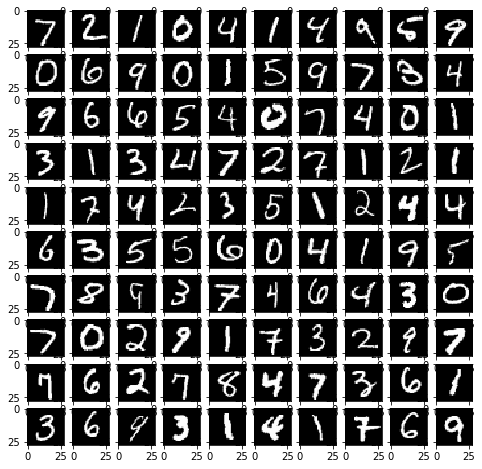

In [6]:
w = 10
h = 10
fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10
for i in range(0, rows*columns):
    img = x_test[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [44]:
x_test.shape

(10000, 28, 28)

In [28]:
import numpy as np
from skimage import transform
def resize_batch(image):
    image = image.reshape((-1,28,28,1))
    resized = np.zeros((image.shape[0],32,32,1))
    for i in range(image.shape[0]):
        resized[i,...,0] = transform.resize(image[i,...,0], (32,32))
    return resized

In [30]:
X_train = resize_batch(x_train)
X_test = resize_batch(x_test)

In [31]:
X_testst.shape

(10000, 32, 32, 1)

In [32]:
X_train.shape

(60000, 32, 32, 1)

In [33]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

In [34]:
batch_size = 128
epochs = 15
num_classes = 10

In [35]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

In [36]:
input_shape = (32,32,1)

In [41]:
keras.backend.clear_session()
# Input size = 32X32
model = Sequential()
# 6 filters of size 5X5
# Output size = 6 X 28 X 28 feature maps
model.add(Conv2D(6, kernel_size=(5,5), activation='relu',input_shape=input_shape))
# Max Pool of 2X2 with stride 2
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2),))
model.add(Conv2D(16,kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Output size = 16 X 5 X 5 =flatten= 400 X 1

model.add(Flatten())
# Neurons = 120 120 X 1
# Weight matrix size =  [120 X 400][400 X 1]
model.add(Dense(120, activation='relu'))

# Neurons = 84 84 X 1
# Weight matrix size = [84 X 120] [120 X 1]
model.add(Dense(84, activation='relu'))

# Neurons = 10  10 X 1
# Weight matrix size =  [10 X 84] [84 X 1]
model.add(Dense(10, activation='softmax'))


In [42]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 19s 318us/step - loss: 0.2904 - accuracy: 0.9141 - val_loss: 0.0806 - val_accuracy: 0.9732
Epoch 2/15
60000/60000 [==============================] - 18s 302us/step - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0.0628 - val_accuracy: 0.9810
Epoch 3/15
60000/60000 [==============================] - 18s 300us/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 4/15
60000/60000 [==============================] - 19s 311us/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0405 - val_accuracy: 0.9868
Epoch 5/15
60000/60000 [==============================] - 18s 308us/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0423 - val_accuracy: 0.9847
Epoch 6/15
60000/60000 [==============================] - 18s 305us/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0485 - val_accuracy: 0.9841
Epoch 7/15
60000/60000 [==============================] 